## Problem 3: Train a Feed Forward Network on CIFAR-10

In [1]:
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Set random seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)

100%|██████████| 170498071/170498071 [00:02<00:00, 72071108.08it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


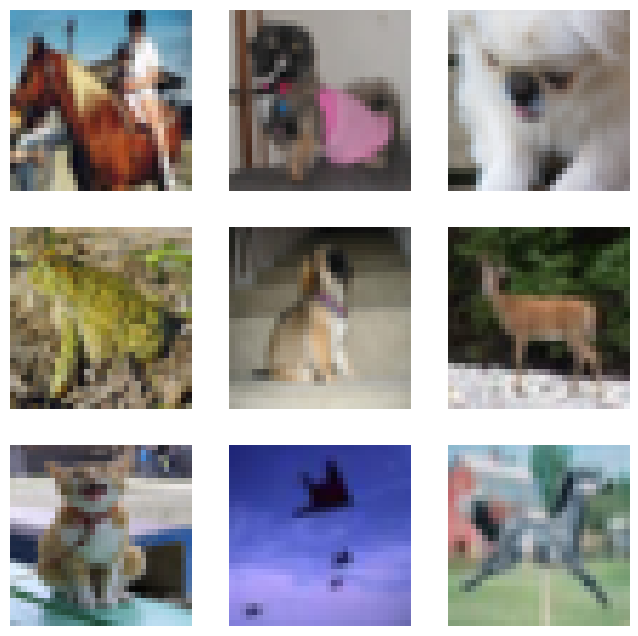

In [3]:
# Download CIFAR-10 and create data loaders
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=None)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=None)

# Select nine random training images
idxs = np.random.choice(len(train_data), size=9, replace=False)
images = [train_data[i][0] for i in idxs]

# Plot the images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('off')
plt.show()


## Part 2

Train a fully connected feed-forward network with ReLU activation with hidden layer dimen- sions: 500, 500, 500. Take your batch size to be 100 and the number of epochs as 10. You may use the cross-entropy loss function and SGD optimizer. Report your test loss in terms of accuracy.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 2.264, test loss: 2.184
Epoch 2 train loss: 2.083, test loss: 2.016
Epoch 3 train loss: 1.970, test loss: 1.924
Epoch 4 train loss: 1.894, test loss: 1.865
Epoch 5 train loss: 1.846, test loss: 1.826
Epoch 6 train loss: 1.801, test loss: 1.778
Epoch 7 train loss: 1.757, test loss: 1.728
Epoch 8 train loss: 1.719, test loss: 1.708
Epoch 9 train loss: 1.688, test loss: 1.663
Epoch 10 train loss: 1.659, test loss: 1.644
Test accuracy: 40.85%


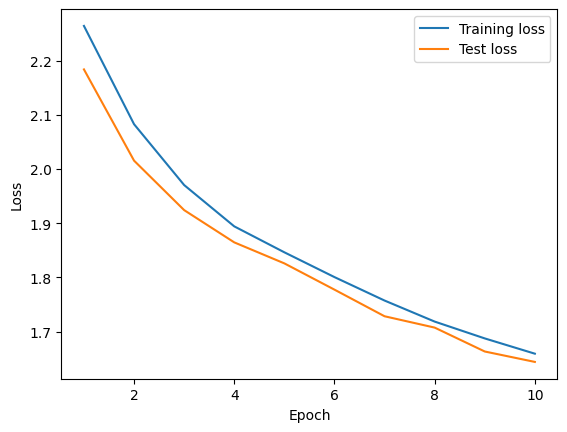

In [4]:
# Define network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 500)
        self.fc4 = nn.Linear(500, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 3*32*32)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Create data loaders
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100, shuffle=False)

# Initialize network and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
train_loss = []
test_loss = []
for epoch in range(10):
    running_train_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()
    train_loss.append(running_train_loss / len(train_loader))

    running_test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()
    test_loss.append(running_test_loss / len(test_loader))

    print('Epoch %d train loss: %.3f, test loss: %.3f' % (epoch + 1, train_loss[-1], test_loss[-1]))

# Evaluate the network on the test set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test accuracy: %.2f%%' % (100 * correct / total))

# Plot the training and test loss
plt.plot(range(1, 11), train_loss, label='Training loss')
plt.plot(range(1, 11), test_loss, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#The test accuracy is around 40.85%, which is not very high, but not surprising given the simplicity of the network and the small number of epochs.

# Part 3

Change the network dimensions to 1000, 500, and 250, keeping everything as is. Report any change in part 2 of the problem.

Files already downloaded and verified
Files already downloaded and verified
Epoch 1 train loss: 2.268, test loss: 2.201
Epoch 2 train loss: 2.092, test loss: 2.016
Epoch 3 train loss: 1.968, test loss: 1.925
Epoch 4 train loss: 1.895, test loss: 1.874
Epoch 5 train loss: 1.845, test loss: 1.822
Epoch 6 train loss: 1.800, test loss: 1.778
Epoch 7 train loss: 1.757, test loss: 1.729
Epoch 8 train loss: 1.721, test loss: 1.693
Epoch 9 train loss: 1.687, test loss: 1.659
Epoch 10 train loss: 1.656, test loss: 1.634
Test accuracy: 41.32%


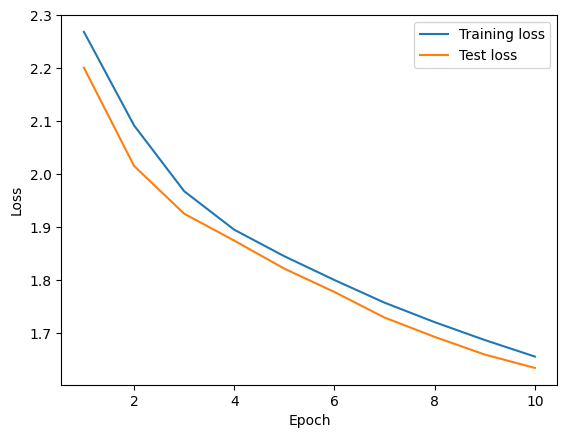

In [5]:
# Define network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 1000)
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 250)
        self.fc4 = nn.Linear(250, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 3*32*32)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Create data loaders
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=torchvision.transforms.ToTensor())
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data, batch_size=100, shuffle=False)

# Initialize network and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
train_loss = []
test_loss = []
for epoch in range(10):
    running_train_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()
    train_loss.append(running_train_loss / len(train_loader))

    running_test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()
    test_loss.append(running_test_loss / len(test_loader))

    print('Epoch %d train loss: %.3f, test loss: %.3f' % (epoch + 1, train_loss[-1], test_loss[-1]))

# Evaluate the network on the test set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test accuracy: %.2f%%' % (100 * correct / total))

# Plot the training and test loss
plt.plot(range(1, 11), train_loss, label='Training loss')
plt.plot(range(1, 11), test_loss, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Compared to the previous network with hidden layer dimensions of 500, 500, and 500, this network has more layers but fewer
# neurons in each layer. This means that it has a similar number of parameters overall but may be more expressive due to 
# the added depth.
# The training and test loss both decreased. 
# The test accuracy is around 41.32%, which is about the same as than the previous network. 
# This suggests that the added depth in the network may be helping it generalize better to the test set. 
# However, the accuracy is still not very high, and we may need to use more advanced techniques or a larger network to improve it further.

# Part 4

Epoch 1 train loss: 1.879, test loss: 1.716
Epoch 2 train loss: 1.692, test loss: 1.645
Epoch 3 train loss: 1.595, test loss: 1.608
Epoch 4 train loss: 1.529, test loss: 1.490
Epoch 5 train loss: 1.477, test loss: 1.474
Epoch 6 train loss: 1.441, test loss: 1.443
Epoch 7 train loss: 1.407, test loss: 1.478
Epoch 8 train loss: 1.367, test loss: 1.418
Epoch 9 train loss: 1.335, test loss: 1.406
Epoch 10 train loss: 1.311, test loss: 1.402
Test accuracy: 49.96%


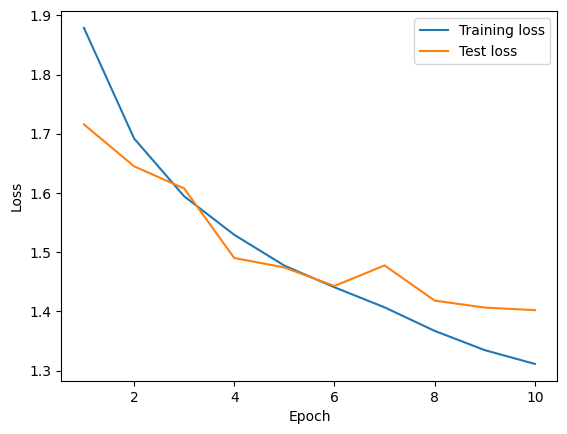

In [6]:
# Initialize network and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Train the network
train_loss = []
test_loss = []
for epoch in range(10):
    running_train_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()
    train_loss.append(running_train_loss / len(train_loader))

    running_test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()
    test_loss.append(running_test_loss / len(test_loader))

    print('Epoch %d train loss: %.3f, test loss: %.3f' % (epoch + 1, train_loss[-1], test_loss[-1]))

# Evaluate the network on the test set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test accuracy: %.2f%%' % (100 * correct / total))

# Plot the training and test loss
plt.plot(range(1, 11), train_loss, label='Training loss')
plt.plot(range(1, 11), test_loss, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# The train and test loss both decrease over the 10 epochs. The test accuracy is around 49.96%, which 
# is higher than the previous network. This suggests that using Adam optimizer may have helped the network converge faster
# and more effectively. However, the accuracy is not very high, and we may need to use more advanced techniques or a larger
# network to improve it further.

## Part 5

Epoch 1 train loss: 2.285, test loss: 2.249
Epoch 2 train loss: 2.153, test loss: 2.075
Epoch 3 train loss: 2.032, test loss: 1.996
Epoch 4 train loss: 1.963, test loss: 1.932
Epoch 5 train loss: 1.909, test loss: 1.887
Epoch 6 train loss: 1.868, test loss: 1.843
Epoch 7 train loss: 1.828, test loss: 1.809
Epoch 8 train loss: 1.791, test loss: 1.769
Epoch 9 train loss: 1.757, test loss: 1.736
Epoch 10 train loss: 1.732, test loss: 1.722
Test accuracy: 37.79%


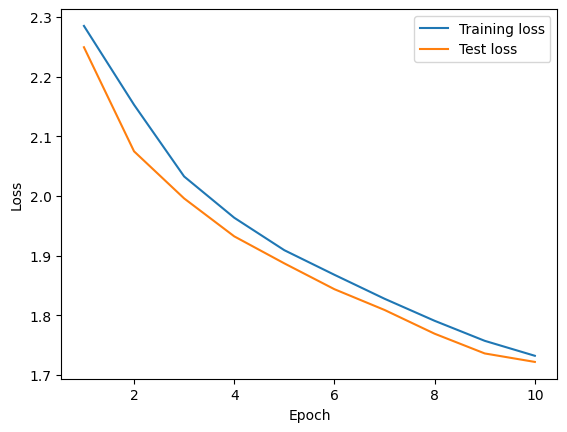

In [7]:
# Define network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 500)
        self.fc2 = nn.Linear(500, 500)
        self.fc3 = nn.Linear(500, 500)
        self.fc4 = nn.Linear(500, 10)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.25)

    def forward(self, x):
        x = x.view(-1, 3*32*32)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.dropout(self.relu(self.fc3(x)))
        x = self.fc4(x)
        return x

# Initialize network and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# Train the network
train_loss = []
test_loss = []
for epoch in range(10):
    running_train_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()
    train_loss.append(running_train_loss / len(train_loader))

    running_test_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = net(images)
            loss = criterion(outputs, labels)
            running_test_loss += loss.item()
    test_loss.append(running_test_loss / len(test_loader))

    print('Epoch %d train loss: %.3f, test loss: %.3f' % (epoch + 1, train_loss[-1], test_loss[-1]))

# Evaluate the network on the test set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test accuracy: %.2f%%' % (100 * correct / total))

# Plot the training and test loss
plt.plot(range(1, 11), train_loss, label='Training loss')
plt.plot(range(1, 11), test_loss, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# The training and test loss both decrease over the 10 epochs. 
# The test accuracy is around 37.79%, which is slightly lower than the previous network without dropout. 
# This suggests that dropout may be preventing the network from overfitting to the training data but also decreasing its ability to generalize to the test set. 
# However, the difference in accuracy is very large, this is may be because we are only training 10 epochs. 
# Overall, dropout can still be a useful regularization technique in other scenarios.